## Neighbourhood clustering (numeric labels)

MuSpAn domain loaded successfully. Domain summary:
Domain name: Visium-Colon-Adenocarcinoma
Number of objects: 6487
Collections: ['Spots']
Labels: ['Barcode', 'Spot cluster', 'Spot diameter', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12', 'Topic 13', 'Topic 14', 'Topic 15', 'Topic 16'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x1000 with 8 Axes>, <Axes: >)

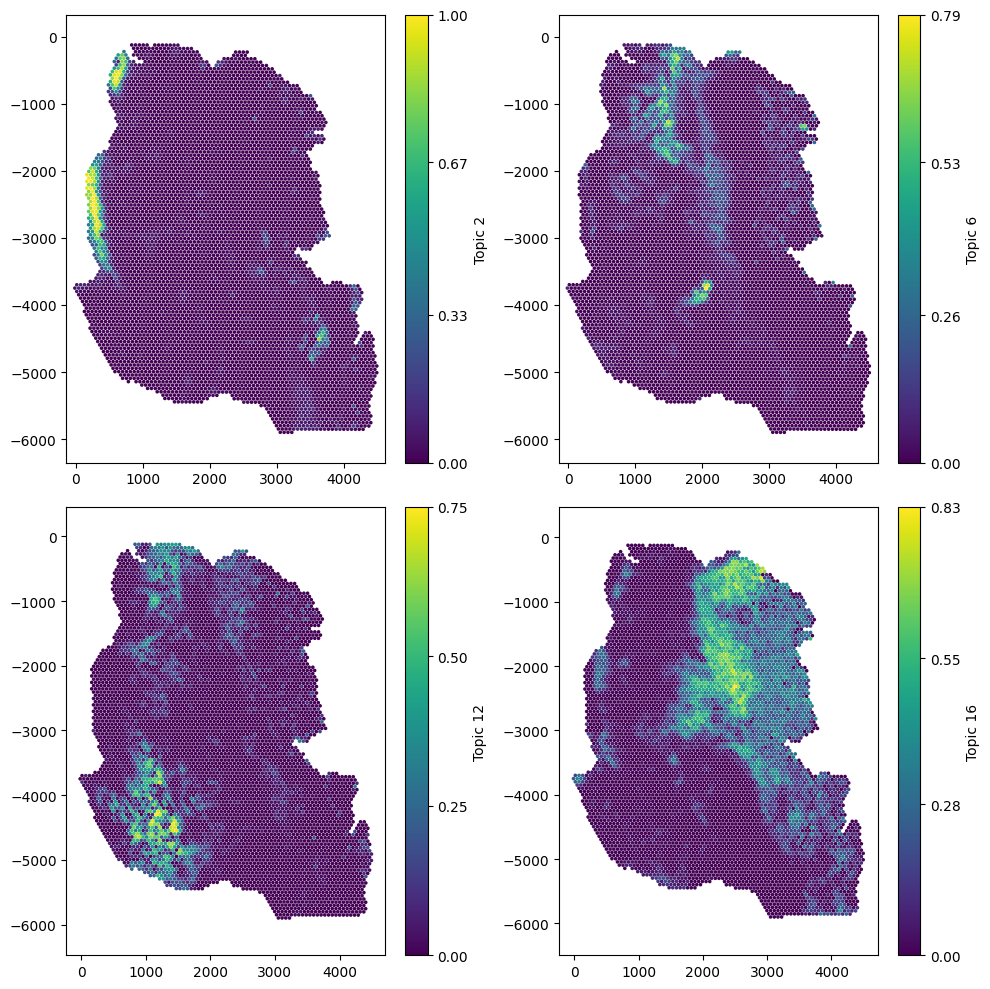

In [27]:
# Import necessary libraries
import muspan as ms
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# Load the example domain dataset
example_domain = ms.datasets.load_example_domain('Visium-Colon-Adenocarcinoma')

# Set up the figure and axes for visualization
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Visualize different topics in the example domain
ms.visualise.visualise(example_domain, 'Topic 2', ax=ax[0, 0], marker_size=2.5)
ms.visualise.visualise(example_domain, 'Topic 6', ax=ax[0, 1], marker_size=2.5)
ms.visualise.visualise(example_domain, 'Topic 12', ax=ax[1, 0], marker_size=2.5)
ms.visualise.visualise(example_domain, 'Topic 16', ax=ax[1, 1], marker_size=2.5)

In [28]:
# Print labels for the spot diameter - this is to see how large our network edges distances should be 
example_domain.print_labels('Spot diameter')


           Spot diameter
object_id               
0.0           219.358065
1.0           219.358065
2.0           219.358065
3.0           219.358065
4.0           219.358065
...                  ...
6482.0        219.358065
6483.0        219.358065
6484.0        219.358065
6485.0        219.358065
6486.0        219.358065

[6487 rows x 1 columns]


In [30]:
# get a list of all numeric labels we want to use for neighbourhood clustering - these are the topic labels
numeric_labels = [f'Topic {i}' for i in range(1,17)]

# Perform cluster neighbourhood analysis
neighbourhood_enrichment_matrix,label_categories,cluster_categories=ms.networks.cluster_neighbourhoods(example_domain,
                                   label_name=numeric_labels,
                                   network_kwargs=dict(network_type='Delaunay',max_edge_distance=220),
                                   k_hops=3,
                                   transform_neighbourhood_composition='sqrt',
                                   neighbourhood_label_name='Neighbourhood ID',
                                   cluster_method='kmeans',
                                   cluster_parameters=dict(n_clusters=9),
                                   neighbourhood_enrichment_as='zscore')

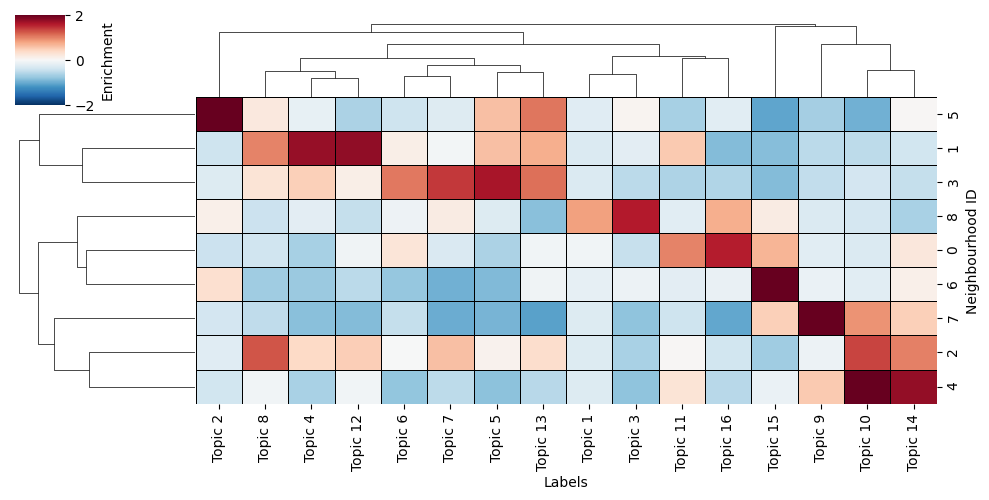

In [31]:
# this is simply visualising the neighbourhood enrichment matrix as a clustermap    

# Create a DataFrame from the neighbourhood enrichment matrix
df_ME_id = pd.DataFrame(data=neighbourhood_enrichment_matrix, index=cluster_categories, columns=label_categories)
df_ME_id.index.name = 'Neighbourhood ID'
df_ME_id.columns.name = 'Labels'

# Visualize the neighbourhood enrichment matrix using a clustermap
sns.clustermap(
    df_ME_id,
    xticklabels=label_categories,
    yticklabels=cluster_categories,
    figsize=(10, 5),
    cmap='RdBu_r',
    col_cluster=True,
    row_cluster=True,
    square=True,
    linewidths=0.5,
    linecolor='black',
    cbar_kws=dict(use_gridspec=False, label='Enrichment', ticks=[-2, 0, 2]),
    vmin=-2,
    vmax=2,
    tree_kws={'linewidths': 0.5, 'color': 'black'}
)

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

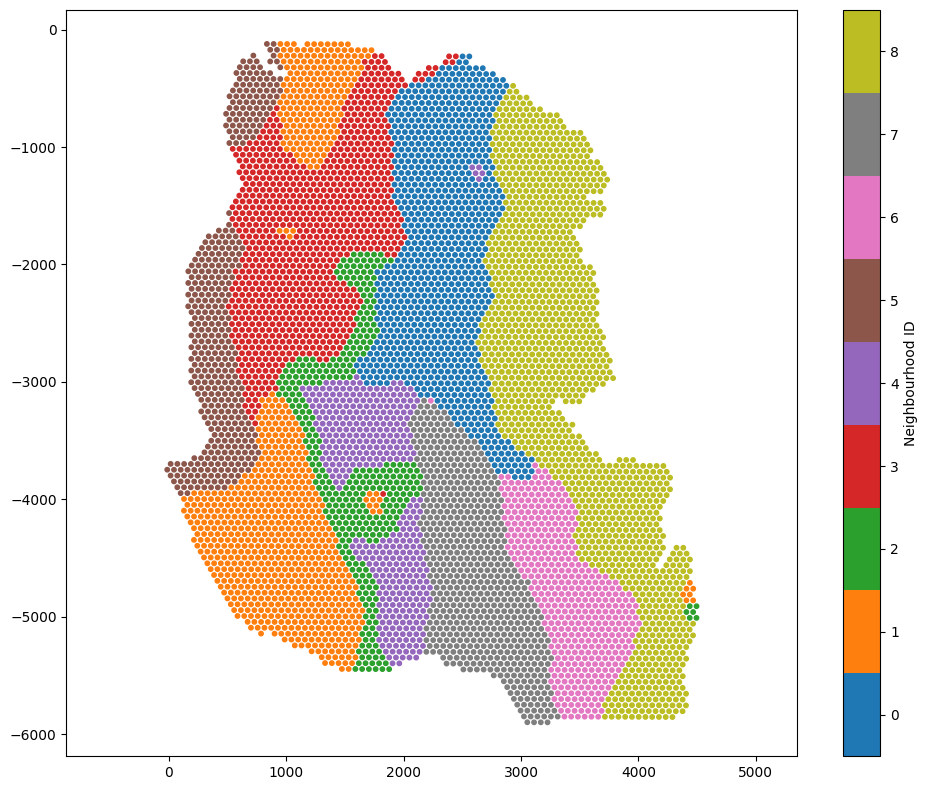

In [32]:
# visualise the neighbourhood clusters on the spatial domain
ms.visualise.visualise(example_domain,'Neighbourhood ID',marker_size=10)
